In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv('Data/original.csv')
df

,aseg_Left-Cerebellum-White-Matter,aseg_Left-Cerebellum-Cortex,aseg_Left-Thalamus,aseg_Left-Caudate,aseg_Left-Putamen,aseg_Left-Pallidum,aseg_Brain-Stem,aseg_Left-Hippocampus,aseg_Left-Amygdala,aseg_Left-Accumbens-area,...,wmparc_wm-rh-superiorfrontal,wmparc_wm-rh-superiorparietal,wmparc_wm-rh-superiortemporal,wmparc_wm-rh-supramarginal,wmparc_wm-rh-frontalpole,wmparc_wm-rh-temporalpole,wmparc_wm-rh-transversetemporal,wmparc_wm-rh-insula,wmparc_Left-UnsegmentedWhiteMatter,wmparc_Right-UnsegmentedWhiteMatter
0,13706.1,50274.2,7559.5,3314.4,4922.1,1671.2,17953.4,4179.7,1491.3,540.5,...,18565.4,11848.3,8129.0,8736.6,381.7,723.3,636.2,10862.9,34016.5,32253.2
1,11981.9,51047.5,8563.6,3525.5,5072.9,1633.4,17662.2,4247.6,1446.9,477.8,...,15577.1,10289.2,6145.2,8386.2,307.4,715.4,496.3,8409.0,30334.0,33284.7
2,21259.1,62010.0,9594.8,3376.6,5125.7,2386.0,22903.6,4604.2,1595.9,337.6,...,22376.1,11366.6,8323.6,9290.7,484.2,734.7,613.3,10585.0,34007.3,32710.9
3,21745.4,54823.7,8708.1,4503.2,6281.9,2259.7,22801.7,4925.7,1868.9,518.3,...,18305.7,12225.8,9422.6,9690.4,452.8,844.0,654.0,11146.3,31778.2,30407.8
4,17233.3,57743.1,9288.5,3706.9,5902.9,2511.3,21597.8,4795.1,1779.5,477.0,...,17272.5,12557.2,7031.8,8993.7,395.9,1033.6,600.9,10615.9,34509.2,32888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,13786.4,54537.3,7902.8,3075.6,4129.8,1991.4,20980.4,4229.0,1639.5,338.8,...,16386.7,14765.0,7485.8,9449.4,345.1,930.7,861.4,9895.0,35185.6,35635.4
1596,14876.8,55987.1,8009.5,3343.2,5091.7,1974.9,21835.5,3630.9,1569.1,475.1,...,17264.9,12851.4,6271.0,8483.7,347.3,642.3,779.0,9703.9,35090.9,34014.9
1597,15533.6,52459.5,8732.0,3410.0,5185.2,2125.4,21134.2,4051.4,1352.5,465.9,...,18231.9,13271.8,6718.9,6707.7,406.5,857.8,676.4,9093.7,29642.8,30435.8
1598,22349.1,56921.2,10410.8,4130.0,5464.3,2476.4,22135.7,4073.4,1721.0,557.7,...,21797.0,12247.4,8580.3,9761.5,470.4,763.9,666.0,9403.8,34844.6,35012.3


<Axes: xlabel='sex'>

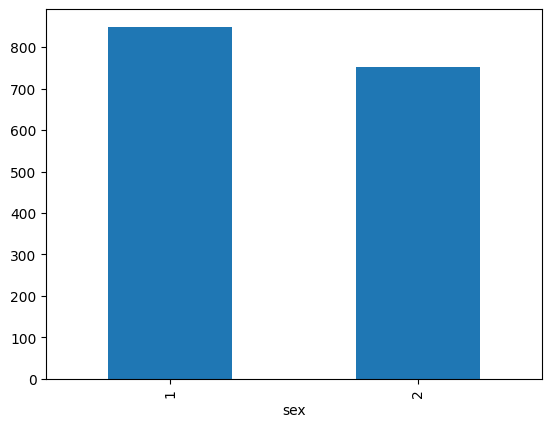

In [4]:
numerical_df = df.select_dtypes(exclude='object')
sex_count = df['sex'].value_counts()
sex_count.plot(kind = 'bar')

In [6]:
corr = df.corr(method='spearman')

for i in df.columns:
    for j in df.columns:
        if(i < j and abs(corr[i][j] > 0.7)):
            print((i,j))

('aseg_Left-Cerebellum-White-Matter', 'aseg_Right-Cerebellum-White-Matter')
('aseg_Left-Cerebellum-Cortex', 'aseg_Right-Cerebellum-Cortex')
('aseg_Left-Thalamus', 'aseg_Right-Thalamus')
('aseg_Left-Caudate', 'aseg_Right-Caudate')
('aseg_Left-Putamen', 'aseg_Right-Putamen')
('aseg_Left-Pallidum', 'aseg_Right-Pallidum')
('aseg_Left-Hippocampus', 'aseg_Right-Hippocampus')
('aseg_Left-Amygdala', 'aseg_Right-Amygdala')
('aseg_Left-VentralDC', 'aseg_Right-VentralDC')
('aseg_Right-Thalamus', 'aseg_Right-VentralDC')
('aseg_CC_Central', 'aseg_CC_Mid_Anterior')
('lh.GausCurv_caudalanteriorcingulate', 'lh.GrayVol_caudalanteriorcingulate')
('lh.GausCurv_caudalanteriorcingulate', 'lh.SurfArea_caudalanteriorcingulate')
('lh.GausCurv_caudalanteriorcingulate', 'wmparc_wm-lh-caudalanteriorcingulate')
('lh.GausCurv_caudalmiddlefrontal', 'lh.GrayVol_caudalmiddlefrontal')
('lh.GausCurv_caudalmiddlefrontal', 'lh.SurfArea_caudalmiddlefrontal')
('lh.GausCurv_caudalmiddlefrontal', 'wmparc_wm-lh-caudalmiddlefr

### Big dimension of feature
- due to the sheer amount of features available , and observing the correlated pairs,most of the the same brain part / region across left and hemisphere has a high correlation.
- consider merging the left and right hemisphere.
- use better model to handle correlation (light gbm)